In [0]:
# Austin Placinto
# I have neither given nor received any unauthorized aid in completing this work,
# nor have I presented someone else's work as my own.
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np

#BP_1 Perceptron

In [2]:
# BP with GD (Gradient Descent) for a AND Perceptron 
# 
# alpha = some number between 0 and 1
# repeat until termination condition (such as slope == 0)
#     calcuate "slope" at current "w" position
#     w = w - alpha * slope (if slope is steep, change large, else small)
# 
# 
import numpy as np

def sigmoid(x):
    output = 1/(1+np.exp(-x))
    return output

# convert output of sigmoid function to its derivative
def sigmoid_derivative(output):
    return output*(1-output)
    
# input dataset
X = np.array([  [0, 0, 1],
                [0, 1, 1],
                [1, 0, 1],
                [1, 1, 1]  ])
    
# output dataset "AND"          
y_target = np.array([[0,0,0,1]]).T

# seed random numbers to make calculation deterministic, a good practice to degug
np.random.seed(1)

# initialize weights randomly with mean 0
W = 2*np.random.random((3,1)) - 1
#print("Initial weights\n", W)

alpha = 1.0 

for _ in range(1000): 
    Y = sigmoid(np.dot(X, W)) # feed forward propagation
    # print("Outputs for 4 Examples\n", Y)
    # how much did we miss?
    Y_error = Y - y_target

    # multiply how much we missed by the 
    # slope of the sigmoid at the values in Y
    Y_delta = Y_error * sigmoid_derivative(Y)
    # print("Y_delta\n", Y_delta)
    W_derivative = np.dot(X.T, Y_delta)
    # print("W_derivative\n", W_derivative)
    
    # update weights
    W -= alpha*W_derivative
    # print("Updated weights\n", W)

print ("Output After Training:")
print (Y)
print (Y.round())

Output After Training:
[[2.44056107e-04]
 [5.54930351e-02]
 [5.54930344e-02]
 [9.33952860e-01]]
[[0.]
 [0.]
 [0.]
 [1.]]


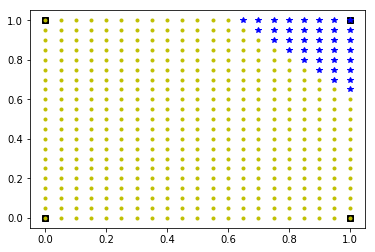

In [6]:
# Plot corners first
xp = np.array([ [0], [0], [1], [1] ])
yp = np.array([ [0], [1], [0], [1] ])
plt.plot(xp, yp, 'ks')

# Test each point, arrange into assorted arrays based on result
xpass = np.empty([0, 1])
ypass = np.empty([0, 1])
xfail = np.empty([0, 1])
yfail = np.empty([0, 1])

for x in np.arange(0.0, 1.05, 0.05): # cannot use range since start and stop must be int
  for y in np.arange(0.0, 1.05, 0.05):
    temp = np.array([[x, y, 1]])
    if np.dot(temp, W).round() >= 1:
      xpass = np.append(xpass, np.array([[x]]), axis = 0)
      ypass = np.append(ypass, np.array([[y]]), axis = 0)
    elif np.dot(temp, W).round() <= 0:
      xfail = np.append(xfail, np.array([[x]]), axis = 0)
      yfail = np.append(yfail, np.array([[y]]), axis = 0)


# -------- PLOT the graph -----
plt.plot(xpass, ypass, 'b*')
plt.plot(xfail, yfail, 'y.')
plt.show() # Show the figure